In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import mutual_info_score
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv")
df.columns = df.columns.str.replace(' ', '_').str.lower()
df = df[['make','model','year','engine_hp','engine_cylinders','transmission_type','vehicle_style','highway_mpg','city_mpg','msrp']]
df.rename(columns={'msrp':'price'}, inplace=True)
df.shape

(11914, 10)

In [3]:
df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


In [4]:
#1. What is the most frequent observation (mode) for the column transmission_type?
df['transmission_type'].mode()
# df.columns

0    AUTOMATIC
Name: transmission_type, dtype: object

In [5]:
df.dtypes

make                  object
model                 object
year                   int64
engine_hp            float64
engine_cylinders     float64
transmission_type     object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
price                  int64
dtype: object

In [6]:
categorical  = ['make', 'model','transmission_type','vehicle_style']
numerical = ['year', 'engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'price']

In [7]:
df = df.fillna(0)
df.isnull().sum()

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
price                0
dtype: int64

In [8]:
#2. Features with biggest correlation
df[numerical].corrwith(df.price).sort_values()

highway_mpg        -0.160043
city_mpg           -0.157676
year                0.227590
engine_cylinders    0.526274
engine_hp           0.650095
price               1.000000
dtype: float64

In [9]:
df.corr()

C:\Users\65859\AppData\Local\Temp\ipykernel_22532\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,year,engine_hp,engine_cylinders,highway_mpg,city_mpg,price
year,1.000000,0.338714,-0.040708,0.258240,0.198171,0.227590
engine_hp,0.338714,1.000000,0.774851,-0.415707,-0.424918,0.650095
engine_cylinders,-0.040708,0.774851,1.000000,-0.614541,-0.587306,0.526274
highway_mpg,0.258240,-0.415707,-0.614541,1.000000,0.886829,-0.160043
city_mpg,0.198171,-0.424918,-0.587306,0.886829,1.000000,-0.157676
price,0.227590,0.650095,0.526274,-0.160043,-0.157676,1.000000


C:\Users\65859\AppData\Local\Temp\ipykernel_22532\58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

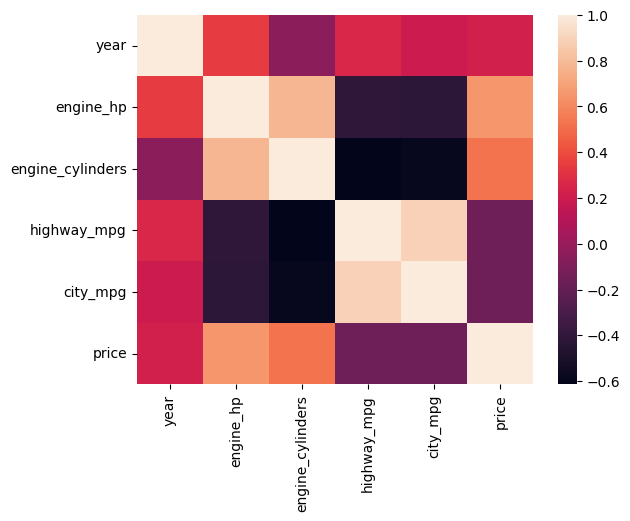

In [10]:
sns.heatmap(df.corr())

In [11]:
df['above_average'] = (df.price>round(df.price.mean(),2)).astype(int)
df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price,above_average
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135,1
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650,1
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350,0
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450,0
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500,0


In [13]:
# np.random.seed(42)
df_train, df_test = train_test_split(df, test_size=0.20, random_state=42)
df_train, df_val = train_test_split(df_train, test_size=0.25, random_state=42)
len(df_train), len(df_test), len(df_val)

(7148, 2383, 2383)

In [14]:
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)

y_train = df_train.above_average.values
y_test = df_test.above_average.values
y_val = df_val.above_average.values

del df_train['above_average']
del df_test['above_average']
del df_val['above_average']


In [41]:
#3: Feature with the lowest mutual information score

def mi_score(series):
    return round(mutual_info_score(series, df.above_average),2)

df[categorical+numerical].apply(mi_score).sort_values()

transmission_type    0.02
highway_mpg          0.04
city_mpg             0.06
year                 0.07
vehicle_style        0.08
engine_cylinders     0.11
make                 0.24
engine_hp            0.36
model                0.46
price                0.59
dtype: float64

In [ ]:
df

In [16]:
#4: Accuracy of the model

from sklearn.feature_extraction import DictVectorizer

train_dict = df_train[categorical+numerical].to_dict(orient='records')

In [17]:
train_dict[0]

{'make': 'Mitsubishi',
 'model': 'Endeavor',
 'transmission_type': 'AUTOMATIC',
 'vehicle_style': '4dr SUV',
 'year': 2011,
 'engine_hp': 225.0,
 'engine_cylinders': 6.0,
 'highway_mpg': 19,
 'city_mpg': 15,
 'price': 33599}

In [18]:
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)
X_train = dv.transform(train_dict)
X_train.shape

DictVectorizer(sparse=False)

In [20]:
dv.get_feature_names()

c:\Users\65859\.conda\envs\practice\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['city_mpg',
 'engine_cylinders',
 'engine_hp',
 'highway_mpg',
 'make=Acura',
 'make=Alfa Romeo',
 'make=Aston Martin',
 'make=Audi',
 'make=BMW',
 'make=Bentley',
 'make=Bugatti',
 'make=Buick',
 'make=Cadillac',
 'make=Chevrolet',
 'make=Chrysler',
 'make=Dodge',
 'make=FIAT',
 'make=Ferrari',
 'make=Ford',
 'make=GMC',
 'make=Genesis',
 'make=HUMMER',
 'make=Honda',
 'make=Hyundai',
 'make=Infiniti',
 'make=Kia',
 'make=Lamborghini',
 'make=Land Rover',
 'make=Lexus',
 'make=Lincoln',
 'make=Lotus',
 'make=Maserati',
 'make=Maybach',
 'make=Mazda',
 'make=McLaren',
 'make=Mercedes-Benz',
 'make=Mitsubishi',
 'make=Nissan',
 'make=Oldsmobile',
 'make=Plymouth',
 'make=Pontiac',
 'make=Porsche',
 'make=Rolls-Royce',
 'make=Saab',
 'make=Scion',
 'make=Spyker',
 'make=Subaru',
 'make=Suzuki',
 'make=Tesla',
 'make=Toyota',
 'make=Volkswagen',
 'make=Volvo',
 'model=1 Series',
 'model=100',
 'model=124 Spider',
 'model=190-Class',
 'model=2',
 'model=2 Series',
 'model=200',
 'model=20

In [29]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear',C=10, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(C=10, max_iter=1000, random_state=42, solver='liblinear')

In [37]:
model.coef_[0].round(3)

array([-0.004, -0.001, -0.002, -0.004, -0.   ,  0.   ,  0.   , -0.   ,
        0.   ,  0.   , -0.   ,  0.   , -0.   , -0.   ,  0.   , -0.   ,
       -0.   ,  0.   ,  0.   ,  0.   ,  0.   , -0.   , -0.   ,  0.   ,
       -0.   , -0.   ,  0.   ,  0.   , -0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   , -0.   ,  0.   , -0.   ,  0.   ,
       -0.   ,  0.   ,  0.   , -0.   , -0.   ,  0.   , -0.   , -0.   ,
        0.   ,  0.   , -0.   , -0.   ,  0.   , -0.   , -0.   , -0.   ,
       -0.   , -0.   , -0.   , -0.   , -0.   , -0.   , -0.   ,  0.   ,
        0.   ,  0.   , -0.   , -0.   , -0.   , -0.   , -0.   , -0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   , -0.   , -0.   ,  0.   ,
        0.   ,  0.   ,  0.   , -0.   ,  0.   ,  0.   , -0.   , -0.   ,
       -0.   , -0.   , -0.   ,  0.   , -0.   ,  0.   ,  0.   ,  0.   ,
        0.   , -0.   ,  0.   ,  0.   , -0.   , -0.   ,  0.   ,  0.   ,
       -0.   ,  0.   , -0.   , -0.   , -0.   , -0.   , -0.   , -0.   ,
      

In [39]:
model.intercept_[0]

-9.658766624207324e-05

In [30]:
val_dict = df_val[numerical+categorical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [31]:
model.predict(X_val)

array([0, 1, 0, ..., 0, 1, 1])

In [32]:
y_pred = model.predict_proba(X_val)[:,1]

In [33]:
y_pred

array([6.87097466e-48, 1.00000000e+00, 5.01382435e-81, ...,
       1.97278901e-73, 1.00000000e+00, 1.00000000e+00])

In [34]:
churn = y_pred>0.5

In [35]:
(y_val == churn).mean()

0.9995803608896349

In [40]:
dict(zip(dv.get_feature_names(), model.coef_[0].round(3)))

c:\Users\65859\.conda\envs\practice\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


{'city_mpg': -0.004,
 'engine_cylinders': -0.001,
 'engine_hp': -0.002,
 'highway_mpg': -0.004,
 'make=Acura': -0.0,
 'make=Alfa Romeo': 0.0,
 'make=Aston Martin': 0.0,
 'make=Audi': -0.0,
 'make=BMW': 0.0,
 'make=Bentley': 0.0,
 'make=Bugatti': -0.0,
 'make=Buick': 0.0,
 'make=Cadillac': -0.0,
 'make=Chevrolet': -0.0,
 'make=Chrysler': 0.0,
 'make=Dodge': -0.0,
 'make=FIAT': -0.0,
 'make=Ferrari': 0.0,
 'make=Ford': 0.0,
 'make=GMC': 0.0,
 'make=Genesis': 0.0,
 'make=HUMMER': -0.0,
 'make=Honda': -0.0,
 'make=Hyundai': 0.0,
 'make=Infiniti': -0.0,
 'make=Kia': -0.0,
 'make=Lamborghini': 0.0,
 'make=Land Rover': 0.0,
 'make=Lexus': -0.0,
 'make=Lincoln': 0.0,
 'make=Lotus': 0.0,
 'make=Maserati': 0.0,
 'make=Maybach': 0.0,
 'make=Mazda': 0.0,
 'make=McLaren': 0.0,
 'make=Mercedes-Benz': 0.0,
 'make=Mitsubishi': -0.0,
 'make=Nissan': 0.0,
 'make=Oldsmobile': -0.0,
 'make=Plymouth': 0.0,
 'make=Pontiac': -0.0,
 'make=Porsche': 0.0,
 'make=Rolls-Royce': 0.0,
 'make=Saab': -0.0,
 'make=Sci